In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, 
                             recall_score, f1_score, roc_auc_score, mean_squared_error,
                             classification_report)
from scipy.stats import ks_2samp


===== FOLD 1 =====
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Melhores parâmetros encontrados: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Melhor pontuação de F1 (treino interno): 0.9008629997129479

-- Métricas de Teste --
Confusion Matrix (Test):
[[1505  246]
 [ 263  332]]
Accuracy: 0.7830 | Precision: 0.5744 | Recall: 0.5580 | F1: 0.5661
AUC: 0.8198 | MSE: 0.1481 | KS: 0.5066 (p=0.0000)

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1751
           1       0.57      0.56      0.57       595

    accuracy                           0.78      2346
   macro avg       0.71      0.71      0.71      2346
weighted avg       0.78      0.78      0.78      2346



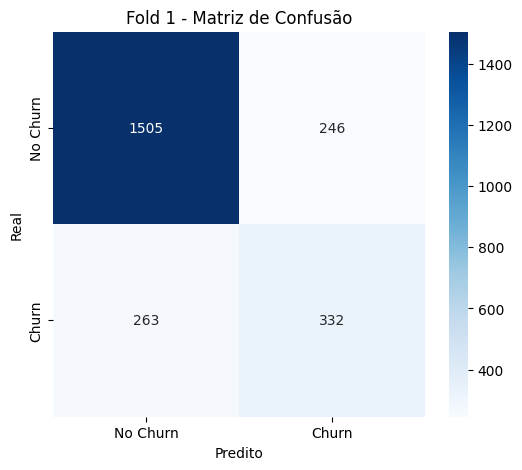


===== FOLD 2 =====
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Melhores parâmetros encontrados: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Melhor pontuação de F1 (treino interno): 0.8960430932445123

-- Métricas de Teste --
Confusion Matrix (Test):
[[1472  240]
 [ 248  386]]
Accuracy: 0.7920 | Precision: 0.6166 | Recall: 0.6088 | F1: 0.6127
AUC: 0.8372 | MSE: 0.1442 | KS: 0.5244 (p=0.0000)

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1712
           1       0.62      0.61      0.61       634

    accuracy                           0.79      2346
   macro avg       0.74      0.73      0.74      2346
weighted avg       0.79      0.79      0.79      2346



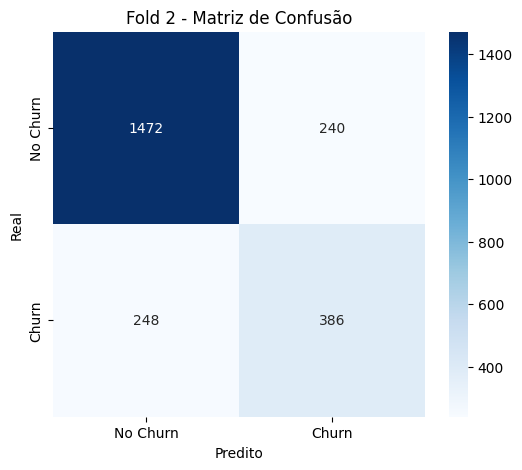


===== FOLD 3 =====
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Melhores parâmetros encontrados: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Melhor pontuação de F1 (treino interno): 0.9068549915630267

-- Métricas de Teste --
Confusion Matrix (Test):
[[1465  242]
 [ 273  365]]
Accuracy: 0.7804 | Precision: 0.6013 | Recall: 0.5721 | F1: 0.5863
AUC: 0.8164 | MSE: 0.1518 | KS: 0.4882 (p=0.0000)

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1707
           1       0.60      0.57      0.59       638

    accuracy                           0.78      2345
   macro avg       0.72      0.72      0.72      2345
weighted avg       0.78      0.78      0.78      2345



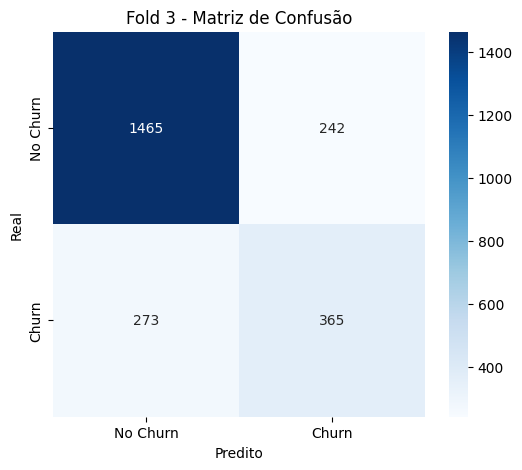


=== RESULTADOS FINAIS (MÉDIA ± DESVIO) NO TESTE ===
Accuracy = 0.7851 ± 0.0050
F1       = 0.5884 ± 0.0191
AUC      = 0.8245 ± 0.0091
MSE      = 0.1481 ± 0.0031
KS       = 0.5064 ± 0.0148


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, 
                             recall_score, f1_score, roc_auc_score, mean_squared_error,
                             classification_report)
from scipy.stats import ks_2samp

# Caminho dos arquivos de cada fold
tree_data_folder = "tree_data"
target_col = "Churn"

# Função para calcular Kolmogorov-Smirnov (KS)
def kolmogorov_smirnov(y_true, y_prob):
    y_bin = np.array(y_true)
    pos_probs = y_prob[y_bin == 1]
    neg_probs = y_prob[y_bin == 0]
    ks_stat, p_value = ks_2samp(pos_probs, neg_probs)
    return ks_stat, p_value

# Função para avaliar métricas
def evaluate_metrics(y_true, y_pred, y_prob):
    y_bin = np.array(y_true)

    cm = confusion_matrix(y_bin, y_pred)
    accuracy = accuracy_score(y_bin, y_pred)
    precision = precision_score(y_bin, y_pred)
    recall = recall_score(y_bin, y_pred)
    f1 = f1_score(y_bin, y_pred)
    auc = roc_auc_score(y_bin, y_prob)
    mse = mean_squared_error(y_bin, y_prob)
    ks_stat, ks_p = kolmogorov_smirnov(y_true, y_prob)

    return {
        "cm": cm,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc": auc,
        "mse": mse,
        "ks_stat": ks_stat,
        "ks_p": ks_p
    }

# Loop para rodar nos 3 folds
all_fold_results = []
n_folds = 3

for i in range(n_folds):
    print(f"\n===== FOLD {i+1} =====")
    
    # Carregar CSVs para treino, validação e teste
    train_path = os.path.join(tree_data_folder, f"train_fold_{i+1}_tree.csv")
    val_path   = os.path.join(tree_data_folder, f"val_fold_{i+1}_tree.csv")
    test_path  = os.path.join(tree_data_folder, f"test_fold_{i+1}_tree.csv")
    
    train_df = pd.read_csv(train_path)
    val_df   = pd.read_csv(val_path)
    test_df  = pd.read_csv(test_path)
    
    # Converter colunas categóricas para numéricas com LabelEncoder
    label_encoders = {}
    categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
    
    for col in categorical_cols:
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        val_df[col] = le.transform(val_df[col])
        test_df[col] = le.transform(test_df[col])
        label_encoders[col] = le  # Armazena para referência

    # Separar X e y (Treino)
    X_train = train_df.drop(columns=[target_col])
    y_train = train_df[target_col]  # Já está em 0/1 após LabelEncoder

    # Separar X e y (Validação e Teste)
    X_val = val_df.drop(columns=[target_col])
    y_val = val_df[target_col]

    X_test = test_df.drop(columns=[target_col])
    y_test = test_df[target_col]

    # Oversampling no conjunto de treinamento
    ros = RandomOverSampler(random_state=42)
    X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

    # Construir pipeline com Oversampling + Random Forest
    pipeline = Pipeline([
        ('oversampler', RandomOverSampler(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
    ])

    # Definir hiperparâmetros para GridSearchCV
    param_grid = {
        'rf__n_estimators': [100, 200],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5],
        'rf__min_samples_leaf': [1, 2]
    }

    # Rodar GridSearchCV no subset de treinamento
    grid = GridSearchCV(
        pipeline,
        param_grid,
        scoring='f1',
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train_res, y_train_res)

    # Melhor modelo encontrado
    best_model = grid.best_estimator_
    print("Melhores parâmetros encontrados:", grid.best_params_)
    print("Melhor pontuação de F1 (treino interno):", grid.best_score_)

    # Avaliar no conjunto de TESTE
    y_test_pred = best_model.predict(X_test)
    y_test_probs = best_model.predict_proba(X_test)[:, 1]
    test_metrics = evaluate_metrics(y_test, y_test_pred, y_test_probs)

    # Exibir métricas
    print("\n-- Métricas de Teste --")
    print(f"Confusion Matrix (Test):\n{test_metrics['cm']}")
    print(f"Accuracy: {test_metrics['accuracy']:.4f} | Precision: {test_metrics['precision']:.4f} | Recall: {test_metrics['recall']:.4f} | F1: {test_metrics['f1']:.4f}")
    print(f"AUC: {test_metrics['auc']:.4f} | MSE: {test_metrics['mse']:.4f} | KS: {test_metrics['ks_stat']:.4f} (p={test_metrics['ks_p']:.4f})")

    # Exibir relatório de classificação
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_test_pred))

    # Exibir matriz de confusão com heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(test_metrics['cm'], annot=True, fmt='d', cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Fold {i+1} - Matriz de Confusão")
    plt.show()

    # Guardar para estatísticas finais
    all_fold_results.append(test_metrics)

# Calcular médias das métricas no TESTE entre os folds
accuracy_test_all = [r["accuracy"] for r in all_fold_results]
f1_test_all  = [r["f1"]  for r in all_fold_results]
auc_test_all = [r["auc"] for r in all_fold_results]
mse_test_all = [r["mse"] for r in all_fold_results]
ks_test_all  = [r["ks_stat"] for r in all_fold_results]

print("\n=== RESULTADOS FINAIS (MÉDIA ± DESVIO) NO TESTE ===")
print(f"Accuracy = {np.mean(accuracy_test_all):.4f} ± {np.std(accuracy_test_all):.4f}")
print(f"F1       = {np.mean(f1_test_all):.4f} ± {np.std(f1_test_all):.4f}")
print(f"AUC      = {np.mean(auc_test_all):.4f} ± {np.std(auc_test_all):.4f}")
print(f"MSE      = {np.mean(mse_test_all):.4f} ± {np.std(mse_test_all):.4f}")
print(f"KS       = {np.mean(ks_test_all):.4f} ± {np.std(ks_test_all):.4f}")